In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string


data = pd.read_csv('20180924-FullFatDesign1536.csv').drop(['Pattern', 'Y'],
         axis = 1)

def calc(v2, concs, power):
    x = np.linspace(0,1, concs)
    x = np.power(x,power)
    x = x/x.max()*500   #normalize from 0-1, multiply by 200 =(500/2.5)
    x = pd.DataFrame(x) #conc in µM
    v1 =(v2*x)/10 # nl
    v1 = np.ceil(v1/2.5)*2.5
    return v1


alphabet =pd.Series(list(string.ascii_lowercase) + ['a' + i for i in list(string.ascii_lowercase)[0:6]])

wells = pd.Series()
for i in range(1,49):
    wells = wells.append(alphabet + str(i))
wells = wells.reset_index(drop = True)

In [357]:
reps = 4
newdata = pd.DataFrame()

for i in range(0, reps):
    newdata = newdata.append(data)
newdata = newdata.sort_values(['[Prot]/µM']) #make version of data with replicates
newdata['Vol/µl'] = 10

newdata = newdata.reset_index()
newdata['index'] = newdata.index

temp = pd.DataFrame() # temporary thing
newdata = newdata.reset_index(drop = True) #yeeeeeeaap
for i in range(0,len(newdata)): ##replicate each experimental run by number of concentrations
    for j in range(0,newdata.loc[i,'No. concs']):
        temp = temp.append([newdata.loc[i]])

##### actually the temp has become the main thing now that it has everything        
temp = temp.reset_index(drop = True)

temp = temp.sort_values(['[Prot]/µM']).reset_index(drop = True)

Vols = pd.Series(name = 'Volumes')

### makes a separate list of concentrations from 'newdata', which is just 'data' exploded by the N reps
for i in range(0,len(newdata)):
    v2 = (newdata.loc[i]['Vol/µl'])
    concs = (newdata.loc[i]['No. concs'])
    power = (newdata.loc[i]['Power'])
    vols = calc(v2, concs, power)
    Vols = Vols.append(vols)
    
Vols.columns = ['Substrate/nl']
Vols = Vols.reset_index(drop = True)

temp = pd.concat([temp, Vols],
         axis = 1,
         join = 'inner')


temp

C:\Users\MFBX3JE3\Anaconda35\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


,index,[Prot]/µM,No. concs,Power,Vol/µl,Substrate/nl
0,0.0,2.0,6.0,1.0,10.0,0.0
1,9.0,2.0,12.0,1.0,10.0,100.0
2,9.0,2.0,12.0,1.0,10.0,200.0
3,9.0,2.0,12.0,1.0,10.0,302.5
4,9.0,2.0,12.0,1.0,10.0,400.0
5,10.0,2.0,6.0,4.0,10.0,500.0
6,10.0,2.0,6.0,4.0,10.0,0.0
7,9.0,2.0,12.0,1.0,10.0,47.5
8,10.0,2.0,6.0,4.0,10.0,92.5
9,10.0,2.0,6.0,4.0,10.0,137.5


# Filling empty rows with zeros

In [358]:
temp2 = temp[temp['[Prot]/µM'] == 2]
temp2 = temp2.append(pd.DataFrame(np.zeros(shape = (16,6)),
                    columns = temp.columns)).reset_index(drop = True)


temp2 = temp2.append(temp[temp['[Prot]/µM'] == 6])

temp2 = temp2.append(temp[temp['[Prot]/µM'] == 10])


zeros = pd.DataFrame(np.zeros(shape = (1536-len(temp2),6)),
                    columns = temp2.columns)



temp2 = temp2.append(zeros,
                  sort  = True).reset_index(drop = True)

layout = pd.concat([wells, temp2],
         axis = 1,
         join = 'inner')
layout

,0,No. concs,Power,Substrate/nl,Vol/µl,[Prot]/µM,index
0,a1,6.0,1.0,0.0,10.0,2.0,0.0
1,b1,12.0,1.0,100.0,10.0,2.0,9.0
2,c1,12.0,1.0,200.0,10.0,2.0,9.0
3,d1,12.0,1.0,302.5,10.0,2.0,9.0
4,e1,12.0,1.0,400.0,10.0,2.0,9.0
5,f1,6.0,4.0,500.0,10.0,2.0,10.0
6,g1,6.0,4.0,0.0,10.0,2.0,10.0
7,h1,12.0,1.0,47.5,10.0,2.0,9.0
8,i1,6.0,4.0,92.5,10.0,2.0,10.0
9,j1,6.0,4.0,137.5,10.0,2.0,10.0


# Maps

<Figure size 432x288 with 0 Axes>

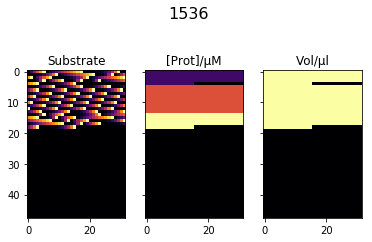

In [4]:
plt.set_cmap('inferno')
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

maparr = []
for i in layout['Substrate/nl']:
    maparr = np.append(maparr, i)
ax1.imshow(maparr.reshape(48,32))
ax1.set_title('Substrate')

#ax1.colorbar(label = 'Vol Substrate/nl')

maparr = []
for i in layout['[Prot]/µM']:
    maparr = np.append(maparr, i)
ax2.imshow(maparr.reshape(48,32))
ax2.set_title('[Prot]/µM')
#ax1.colorbar(label = 'Vol Substrate/nl')

maparr = []
for i in layout['Vol/µl']:
    maparr = np.append(maparr, i)
ax3.imshow(maparr.reshape(48,32))
ax3.set_title('Vol/µl')
#plt.colorbar(label = 'Vol/µl')
f.suptitle('1536', fontsize=16)

plt.show()

# Transfer to XML format

An .xml file can be created or edited in a text editor such as Notepad. Each file starts with the following text:
'#?xml version="1.0"?>  '
'#TransferPlate>  '
Transfer details are then specified for each individual well in the following format:  
'#Transfer SrcID="1" DestID="3" Volume="50"  />  '  
After all transfers have been defined, the file closes with the following text:  
'#/TransferPlate> ' 


In [51]:
#### this just adapts the well IDs to the right sort of numbering system

nums = layout[0].str.split('([A-z]+)', expand=True)
nums[1] = pd.DataFrame([alphabet.index[alphabet == i] for i in nums[1]])[0]

nums['position'] = nums[1]*48 + nums[2].astype(int)

## file header
text = ['<?xml version="1.0"?>',
       '<TransferPlate>']

#body
arr = ['<Transfer SrcID= "'+str(layout['Source Well'][i])+'" DestID="'+ str(nums['position'][i]) +'" Volume="'+str(layout['Substrate/nl'][i])  +'" />' for i in range(0,len(layout))]
arr.append('</TransferPlate>')
#foot

#write to file
outfile = open('20180925-1536well.xml', 'w')

for i in text:
    outfile.write(i)
for i in arr:
    outfile.write(i)
outfile.close()

In [26]:
print('Total vol of substrate in experiment/µl: ',(sum(layout['Substrate/nl'])/1000)/10)
print('Number of test wells: ',len(layout[layout['Vol/µl']!=0]))
print()
print('576/12 = ',576/12)

Total vol of substrate in experiment/µl:  9.879999999999999
Number of test wells:  576

576/12 =  48.0


In [47]:
src = pd.Series(np.array([j for j in [[i]*48 for i in range(1,13)]]).flatten(),
         name = 'Source Well')

layout = pd.concat([layout, src],
          join = 'inner',
          axis = 1)


# 2 Substrates now

In [359]:
layout2 = layout.drop([0], axis = 1).append(layout.drop([0], axis = 1)).reset_index(drop = True)



src = pd.Series(np.array([j for j in [[i]*48 for i in range(1,25)]]).flatten(),
         name = 'Source Well')

layout2 = pd.concat([layout2, src],
          join = 'inner',
          axis = 1)

layout2 = pd.concat([wells, layout2], 
          axis = 1)
layout2 = layout2.fillna(0)

layout2

,0,No. concs,Power,Substrate/nl,Vol/µl,[Prot]/µM,index,Source Well
0,a1,6.0,1.0,0.0,10.0,2.0,0.0,1.0
1,b1,12.0,1.0,100.0,10.0,2.0,9.0,1.0
2,c1,12.0,1.0,200.0,10.0,2.0,9.0,1.0
3,d1,12.0,1.0,302.5,10.0,2.0,9.0,1.0
4,e1,12.0,1.0,400.0,10.0,2.0,9.0,1.0
5,f1,6.0,4.0,500.0,10.0,2.0,10.0,1.0
6,g1,6.0,4.0,0.0,10.0,2.0,10.0,1.0
7,h1,12.0,1.0,47.5,10.0,2.0,9.0,1.0
8,i1,6.0,4.0,92.5,10.0,2.0,10.0,1.0
9,j1,6.0,4.0,137.5,10.0,2.0,10.0,1.0


<Figure size 432x288 with 0 Axes>

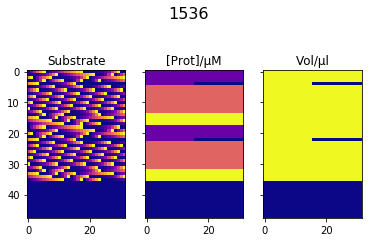

In [106]:
plt.set_cmap('plasma')
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

maparr = []
for i in layout2['Substrate/nl']:
    maparr = np.append(maparr, i)
ax1.imshow(maparr.reshape(48,32))
ax1.set_title('Substrate')

#ax1.colorbar(label = 'Vol Substrate/nl')

maparr = []
for i in layout2['[Prot]/µM']:
    maparr = np.append(maparr, i)
ax2.imshow(maparr.reshape(48,32))
ax2.set_title('[Prot]/µM')
#ax1.colorbar(label = 'Vol Substrate/nl')

maparr = []
for i in layout2['Vol/µl']:
    maparr = np.append(maparr, i)
ax3.imshow(maparr.reshape(48,32))
ax3.set_title('Vol/µl')
#plt.colorbar(label = 'Vol/µl')
f.suptitle('1536', fontsize=16)

plt.show()

# Wells 1-12 = Lauric Acid
## 13-24 = NPG

In [301]:
#### this just adapts the well IDs to the right sort of numbering system
'''layout2 = layout2[layout2['Source Well']!=0][layout2['Substrate/nl']!=0]
nums = layout2[0].str.split('([A-z]+)', expand=True)
nums[1] = pd.DataFrame([alphabet.index[alphabet == i] for i in nums[1]])[0]

nums['position'] = nums[1]*48 + nums[2].astype(int)'''
## file header
text = ['<?xml version="1.0"?>',
       '<TransferPlate>']

#body
arr = ['<Transfer SrcID= "'+str(layout3['Source Well'][i])+'" DestID="'+ str(layout3[WellID][i]) +'" Volume="'+str(layout3['Substrate/nl'][i])  +'" />' for i in layout3.index]
arr.append('</TransferPlate>')
#foot

#write to file
outfile = open('20181004-1536well.xml', 'w')

for i in text:
    outfile.write(i)
for i in arr:
    outfile.write(i)
outfile.close()

KeyError: '[ 1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26\n 27 28 29 31  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21\n 23 24 25 26 27 29 30 31  1  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18\n 19 21 22 23 24 25 26 27 28 29 30 31  1  2  3  4  5  7  8  9 10 11 13 14\n 15 16 17 19 20 21 22 23 25 26 27 28 29 30 31  1  2  3  5  6  7  8  9 10\n 11 12 13 14 15  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 19 20 21\n 22 23 24 25 26 28 29 30 31  1  2  3  5  6  7  8  9 10 11 12 14 15 16 17\n 18 19 20 21 23 24 25 26 27 28 29 30  1  2  3  4  5  6  7  9 10 11 12 13\n 14 15 16 18 19 20 21 22 23 24 25 27 28 29 30 31  1  2  4  5  6  7  8  9\n 10 11 13 14 15 16 17 18 19 20 22 23 24 25 26 27 28 29 31  1  2  3  4  5\n  6  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 26 27 28 29 30 31  1\n  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 21 22 23 24 25 26 27 28\n 30 31  1  2  3  4  5  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 25\n 26 27 28 29 30 31  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 20 21\n 22 23 24 25 26 27 29 30 31  1  2  3  4  6  7  8  9 10 11 12 13 15 16 17\n 18 19 20 21 22 24 25 26 27 28 29 30 31  1  2  3  4  5  7  8  9 10 11 13\n 14 15 16 17 18 19 20 21 22 23 25 26 27 28 29 30 31  1  2  3  5  6  7  8\n  9 11 12 13 14 15 17 18 19 20 21 22 23 24 25 26 27 29 30 31  1  2  3  4\n  5  6  7  9 10 11 12 13 15 16 17 18 19 21 22 23 24 25 26 27 28 29 30 31\n  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 19 20 21 22 23 25 26 27\n 28 29 30 31  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22\n 23 24 25 26 27 28 29 31  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17\n 18 19 20 21 23 24 25 26 27 29 30 31  1  3  4  5  6  7  9 10 11 12 13 14\n 15 16 17 18 19 21 22 23 24 25 26 27 28 29 30 31  1  2  3  4  5  7  8  9\n 10 11 13 14 15 16 17 19 20 21 22 23 25 26 27 28 29 30 31  1  2  3  5  6\n  7  8  9 10 11 12 13 14 15  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16\n 17 19 20 21 22 23 24 25 26 28 29 30 31  1  2  3  5  6  7  8  9 10 11 12\n 14 15 16 17 18 19 20 21 23 24 25 26 27 28 29 30  1  2  3  4  5  6  7  9\n 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25 27 28 29 30 31  1  2  4  5\n  6  7  8  9 10 11 13 14 15 16 17 18 19 20 22 23 24 25 26 27 28 29 31  1\n  2  3  4  5  6  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 26 27 28\n 29 30 31  1  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 21 22 23 24\n 25 26 27 28 30 31  1  2  3  4  5  7  8  9 10 11 12 13 14 16 17 18 19 20\n 21 22 23 25 26 27 28 29 30 31  2  3  4  5  6  7  8  9 11 12 13 14 15 16\n 17 18 20 21 22 23 24 25 26 27 29 30 31  1  2  3  4  6  7  8  9 10 11 12\n 13 15 16 17 18 19 20 21 22 24 25 26 27 28 29 30 31  1  2  3  4  5  7  8\n  9 10 11 13 14 15 16 17 18 19 20 21 22 23 25 26 27 28 29 30 31  1  2  3\n  5  6  7  8  9 11 12 13 14 15 17 18 19 20 21 22 23 24 25 26 27 29 30 31\n  1  2  3  4  5  6  7  9 10 11 12 13 15 16 17 18 19 21 22 23 24 25 26 27\n 28 29 30 31  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 19 20 21 22\n 23 25 26 27 28 29 30 31] not in index'

In [293]:
WellID = pd.Series([alphabet[alphabet == i].index[0] for i in nums[1]], name = 'WellID')

In [360]:
layout3 = pd.concat([layout2, WellID],
         axis = 1,
         join = 'inner')
layout3['Source Well'] = layout3['Source Well'].astype(int)
layout3

,0,No. concs,Power,Substrate/nl,Vol/µl,[Prot]/µM,index,Source Well,WellID
0,a1,6.0,1.0,0.0,10.0,2.0,0.0,1,1
1,b1,12.0,1.0,100.0,10.0,2.0,9.0,1,2
2,c1,12.0,1.0,200.0,10.0,2.0,9.0,1,3
3,d1,12.0,1.0,302.5,10.0,2.0,9.0,1,4
4,e1,12.0,1.0,400.0,10.0,2.0,9.0,1,5
5,f1,6.0,4.0,500.0,10.0,2.0,10.0,1,7
6,g1,6.0,4.0,0.0,10.0,2.0,10.0,1,8
7,h1,12.0,1.0,47.5,10.0,2.0,9.0,1,9
8,i1,6.0,4.0,92.5,10.0,2.0,10.0,1,10
9,j1,6.0,4.0,137.5,10.0,2.0,10.0,1,11


In [361]:
layout3.to_csv('20181015-1536PlateLayout3.csv')
#layout.append(layout).reset_index(drop = True).to_csv('20181015-1536PlateLayoutall.csv')


In [118]:
print('2µM: ',sum(layout2[layout2['[Prot]/µM'] ==2]['Vol/µl']))
print('6µM: ',sum(layout2[layout2['[Prot]/µM'] ==6]['Vol/µl']))
print('10µM: ',sum(layout2[layout2['[Prot]/µM'] ==10]['Vol/µl']))

2µM:  2880.0
6µM:  5760.0
10µM:  2560.0


In [133]:
print('2µM: ',layout2[layout2['[Prot]/µM'] ==2][0].str.extract('(\d+)')[0].unique())
print()
print('6µM: ',layout2[layout2['[Prot]/µM'] ==6][0].str.extract('(\d+)')[0].unique())
print()
print('10µM: ',layout2[layout2['[Prot]/µM'] ==10][0].str.extract('(\d+)')[0].unique())

2µM:  ['1' '2' '3' '4' '5' '19' '20' '21' '22' '23']

6µM:  ['6' '7' '8' '9' '10' '11' '12' '13' '14' '24' '25' '26' '27' '28' '29'
 '30' '31' '32']

10µM:  ['15' '16' '17' '18' '33' '34' '35' '36']


In [313]:
layout2[layout2['Source Well']!=0][layout2['Substrate/nl']!=0]

,0,No. concs,Power,Substrate/nl,Vol/µl,[Prot]/µM,Source Well
1,b1,12.0,1.0,100.0,10.0,2.0,1.0
2,c1,12.0,1.0,200.0,10.0,2.0,1.0
3,d1,12.0,1.0,302.5,10.0,2.0,1.0
4,e1,12.0,1.0,400.0,10.0,2.0,1.0
5,f1,6.0,4.0,500.0,10.0,2.0,1.0
7,h1,12.0,1.0,47.5,10.0,2.0,1.0
8,i1,6.0,4.0,92.5,10.0,2.0,1.0
9,j1,6.0,4.0,137.5,10.0,2.0,1.0
10,k1,6.0,4.0,182.5,10.0,2.0,1.0
11,l1,6.0,1.0,227.5,10.0,2.0,1.0


In [304]:
layout2.to_csv('20181005-1536wellLayout.csv')